# Clasification pipeline - Evaluation of individual classifiers

In [37]:
import os

# Function to change to the parent directory
def change_to_parent_directory():
    # Check if the directory has already been changed
    if not os.environ.get('DIR_CHANGED'):
        try:
            current_dir = os.path.dirname(os.path.abspath(__file__))
        except NameError:
            current_dir = os.getcwd()
        parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
        os.chdir(parent_dir)
        os.environ['DIR_CHANGED'] = '1'
        print(f"Current working directory changed to: {os.getcwd()}")
    else:
        print("Directory has already been changed.")

# Call the function to change the working directory
change_to_parent_directory()

Directory has already been changed.


## Run classification

In [38]:
# Specify the parquet file with the dataset for classification
test_dataset = 'testdata/ver.parquet'

In [39]:
import pandas as pd
import numpy as np
from classifiers.pipeline import Pipeline

# Initialize the classification pipeline
clf = Pipeline()

# Read the input parquet file
input_df = pd.read_parquet(test_dataset)

#input_df = input_df.sample(frac=1).reset_index(drop=True)

df = clf.generate_preliminary_results(input_df, add_final=False)

CNN model created


In [40]:
pd.reset_option('display.max_rows')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 50)
df

# Assuming df is the given dataframe
columns_to_drop = df.filter(regex='(_sum|_avg|_prod)$').columns
df_filtered = df.drop(columns=columns_to_drop)

# Now print the remaining column names
df_filtered_columns = df_filtered.columns.tolist()
df_filtered_columns

['domain_name',
 'dns_available',
 'dns_nonzero',
 'tls_available',
 'tls_nonzero',
 'ip_available',
 'ip_nonzero',
 'rdap_available',
 'rdap_nonzero',
 'geo_available',
 'geo_nonzero',
 'phishing_cnn_result',
 'phishing_lgbm_result',
 'phishing_xgboost_result',
 'phishing_deepnn_result',
 'phishing_dns_nn_result',
 'phishing_rdap_nn_result',
 'phishing_geo_nn_result',
 'phishing_ip_nn_result',
 'malware_lgbm_result',
 'malware_xgboost_result',
 'malware_deepnn_result',
 'malware_dns_nn_result',
 'malware_rdap_nn_result',
 'malware_geo_nn_result',
 'malware_ip_nn_result',
 'malware_residual_result',
 'malware_cnn_result',
 'malware_gru_result',
 'malware_deep_result',
 'dga_binary_deepnn_result',
 'dga_binary_lgbm_result',
 'label']

In [41]:
#pd.set_option('display.max_rows', None)
#preliminary_results_df[preliminary_results_df["label"].isin(["benign", "phishing"])][["domain_name", "label", "phishing_cnn_result", "phishing_deepnn_result", "phishing_lgbm_result", "phishing_xgboost_result", "phishing_dns_nn_result", "phishing_rdap_nn_result", "phishing_geo_nn_result", "phishing_ip_nn_result"]]
#df[df["label"].isin(["benign", "phishing"])][["domain_name", "label", "phishing_cnn_result", "phishing_xgboost_result", "phishing_dns_nn_result", "phishing_rdap_nn_result", "phishing_geo_nn_result", "phishing_ip_nn_result"]]

In [42]:
df

,domain_name,dns_available,dns_nonzero,tls_available,tls_nonzero,ip_available,ip_nonzero,rdap_available,rdap_nonzero,geo_available,geo_nonzero,phishing_cnn_result,phishing_lgbm_result,phishing_xgboost_result,phishing_deepnn_result,phishing_dns_nn_result,phishing_rdap_nn_result,phishing_geo_nn_result,phishing_ip_nn_result,malware_lgbm_result,malware_xgboost_result,malware_deepnn_result,malware_dns_nn_result,malware_rdap_nn_result,malware_geo_nn_result,malware_ip_nn_result,malware_residual_result,malware_cnn_result,malware_gru_result,malware_deep_result,dga_binary_deepnn_result,dga_binary_lgbm_result,phishing_sum,phishing_avg,phishing_prod,malware_sum,malware_avg,malware_prod,dga_binary_sum,dga_binary_avg,dga_binary_prod,total_sum,total_avg,total_prod,label
3617,yps.link,0.9,0.550,1.0,0.791667,1.0,0.875,1.000000,0.833333,1.0,0.722222,0.008572,0.004046,0.001031,0.012314,0.044231,0.005160,0.521558,0.604498,0.077721,0.306776,0.695695,0.201927,0.003683,0.399883,0.158276,1.595875e-15,0.0,0.000000e+00,4.824453e-04,2.666077e-02,0.000313,1.201410,0.150176,3.168028e-14,1.844444,0.167677,0.0,0.026974,0.013487,8.356396e-06,3.072828,0.146325,0.0,benign
2106,www.sacramentospice.com,0.6,0.250,1.0,0.791667,1.0,0.750,1.000000,0.625000,1.0,1.000000,0.002964,0.018101,0.001954,0.934479,0.214492,0.006561,0.397401,0.534281,0.004576,0.006310,0.032223,0.334840,0.013968,0.688216,0.548636,2.585270e-28,0.0,0.000000e+00,1.257676e-11,3.563161e-17,0.000011,2.110233,0.263779,2.927924e-11,1.628769,0.148070,0.0,0.000011,0.000005,3.812587e-22,3.739013,0.178048,0.0,benign
1160,kasmat.cz,1.0,0.750,1.0,0.833333,1.0,0.750,1.000000,0.750000,1.0,1.000000,0.006938,0.012656,0.000899,0.666434,0.008610,0.110088,0.397401,0.534697,0.382920,0.927471,0.852666,0.049906,0.025517,0.688216,0.594906,3.912897e-09,0.0,2.271835e-21,1.166600e-09,1.555185e-02,0.000033,1.737722,0.217215,1.059703e-11,3.521602,0.320146,0.0,0.015585,0.007792,5.096450e-07,5.274909,0.251186,0.0,benign
3445,www.stolniceni.cz,0.6,0.225,1.0,0.791667,1.0,0.625,1.000000,0.833333,1.0,0.666667,0.036347,0.006082,0.001204,0.369327,0.016036,0.004731,0.009979,0.818973,0.003974,0.006191,0.001642,0.023515,0.009264,0.037617,0.255954,1.486102e-14,0.0,0.000000e+00,4.563265e-10,3.114730e-23,0.000047,1.262678,0.157835,6.092267e-14,0.338156,0.030741,0.0,0.000047,0.000024,1.468129e-27,1.600881,0.076232,0.0,benign
3709,loans837113.life,0.9,0.600,1.0,0.833333,1.0,0.875,1.000000,0.833333,1.0,0.722222,0.657683,0.932496,0.988724,0.979866,0.567037,0.277729,0.521558,0.604638,0.963357,0.932120,0.865392,0.572065,0.186325,0.399883,0.158520,5.392580e-12,0.0,0.000000e+00,1.813577e-05,3.522000e-01,0.017601,5.529730,0.691216,2.950767e-02,4.077679,0.370698,0.0,0.369801,0.184901,6.199122e-03,9.977210,0.475105,0.0,benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,b.bestcontentwork.top,0.6,0.250,1.0,0.833333,1.0,0.875,0.958333,0.791667,1.0,0.722222,0.114817,0.088317,0.004585,0.013863,0.200976,0.005484,0.521558,0.604820,0.001312,0.002626,0.002203,0.335002,0.003922,0.399883,0.158839,6.792255e-15,0.0,0.000000e+00,3.223855e-15,2.624413e-06,0.000001,1.554420,0.194302,2.240942e-10,0.903788,0.082163,0.0,0.000004,0.000002,2.849306e-12,2.458211,0.117058,0.0,benign
2763,www.rushexperts.com,0.6,0.225,1.0,0.750000,1.0,0.375,1.000000,0.750000,1.0,1.000000,0.052533,0.019238,0.002880,0.746488,0.027845,0.008690,0.030453,0.052379,0.004688,0.008185,0.000052,0.028851,0.008000,0.009907,0.005461,3.644267e-12,0.0,4.500737e-39,3.307220e-11,2.288524e-16,0.000003,0.940506,0.117563,8.385079e-13,0.065144,0.005922,0.0,0.000003,0.000002,7.310487e-22,1.005653,0.047888,0.0,benign
905,noevil.pl,1.0,0.700,1.0,0.750000,1.0,0.625,0.958333,0.583333,1.0,0.944444,0.092484,0.019760,0.008515,0.022474,0.009671,0.016505,0.011397,0.375122,0.269079,0.181805,0.409925,0.059916,0.024067,0.191733,0.300092,2.186266e-07,0.0,0.000000e+00,2.414521e-04,

In [43]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Set display options to prevent splitting the DataFrame across multiple lines
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)        # Set the width to prevent wrapping

# Function to calculate metrics for a given set of classifiers
def calculate_metrics(df, classifier_prefix, relevant_labels=None):
    # Filter the DataFrame for the relevant labels if provided
    if relevant_labels:
        filtered_df = df[df['label'].isin(relevant_labels)]
    else:
        filtered_df = df  # Use the entire DataFrame if no relevant labels are given
    
    # Find classifiers that match the prefix but exclude ones with '_avg', '_sum', or '_prod'
    classifier_columns = [
        col for col in df.columns 
        if col.startswith(classifier_prefix) and not (col.endswith('_avg') or col.endswith('_sum') or col.endswith('_prod'))
    ]
    
    # Create a list to store the metrics
    metrics_list = []
    
    # For each classifier, calculate confusion matrix and metrics
    for classifier in classifier_columns:
        y_pred = (filtered_df[classifier] >= 0.5).astype(int)
        y_true = (filtered_df['label'] != 'benign').astype(int)

        # Calculate confusion matrix components
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

        # Calculate metrics
        accuracy = accuracy_score(y_true, y_pred) * 100
        precision = precision_score(y_true, y_pred) if (tp + fp) > 0 else 0
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0

        # Append the results to the list, including TP, FP, TN, FN
        metrics_list.append({
            'Classifier': classifier.replace('_result', ''),
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'FPR': false_positive_rate,
            'TP': tp,
            'FP': fp,
            'TN': tn,
            'FN': fn
        })
    
    # Create a DataFrame from the list
    metrics_df = pd.DataFrame(metrics_list)
    
    return metrics_df

# Calculate metrics without any filtering for all classifiers
overall_metrics_df = calculate_metrics(df, 'phishing_')  # Change prefix if needed
overall_metrics_df = pd.concat([overall_metrics_df, calculate_metrics(df, 'malware_')])
overall_metrics_df = pd.concat([overall_metrics_df, calculate_metrics(df, 'dga_binary_')])

# Calculate metrics for phishing classifiers with filtering
phishing_metrics_df = calculate_metrics(df, 'phishing_', ['benign', 'phishing'])

# Calculate metrics for malware classifiers with filtering
malware_metrics_df = calculate_metrics(df, 'malware_', ['benign', 'malware'])

# Calculate metrics for dga_binary classifiers with filtering
dga_metrics_df = calculate_metrics(df, 'dga_binary_', ['benign', 'dga'])

print("*** OVERALL ***")
print(overall_metrics_df)

print("\n=== PHISHING ===")
print(phishing_metrics_df)

print("\n=== MALWARE ===")
print(malware_metrics_df)

print("\n=== DGA ===")
print(dga_metrics_df)


*** OVERALL ***
           Classifier   Accuracy  Precision    Recall  F1 Score      FPR   TP   FP    TN    FN
0        phishing_cnn  86.632492   0.665546  0.738806  0.700265  0.09950  792  398  3602   280
1       phishing_lgbm  84.976341   0.776786  0.405784  0.533088  0.03125  435  125  3875   637
2    phishing_xgboost  84.897476   0.761092  0.416045  0.537998  0.03500  446  140  3860   626
3     phishing_deepnn  76.932177   0.465590  0.618470  0.531250  0.19025  663  761  3239   409
4     phishing_dns_nn  83.162461   0.786842  0.278918  0.411846  0.02025  299   81  3919   773
5    phishing_rdap_nn  83.911672   0.857542  0.286381  0.429371  0.01275  307   51  3949   765
6     phishing_geo_nn  71.825710   0.321678  0.300373  0.310661  0.16975  322  679  3321   750
7      phishing_ip_nn  72.338328   0.357204  0.386194  0.371134  0.18625  414  745  3255   658
0        malware_lgbm  77.779968   0.442105  0.195896  0.271493  0.06625  210  265  3735   862
1     malware_xgboost  74.901420  

## Boxplots of classifiers' results

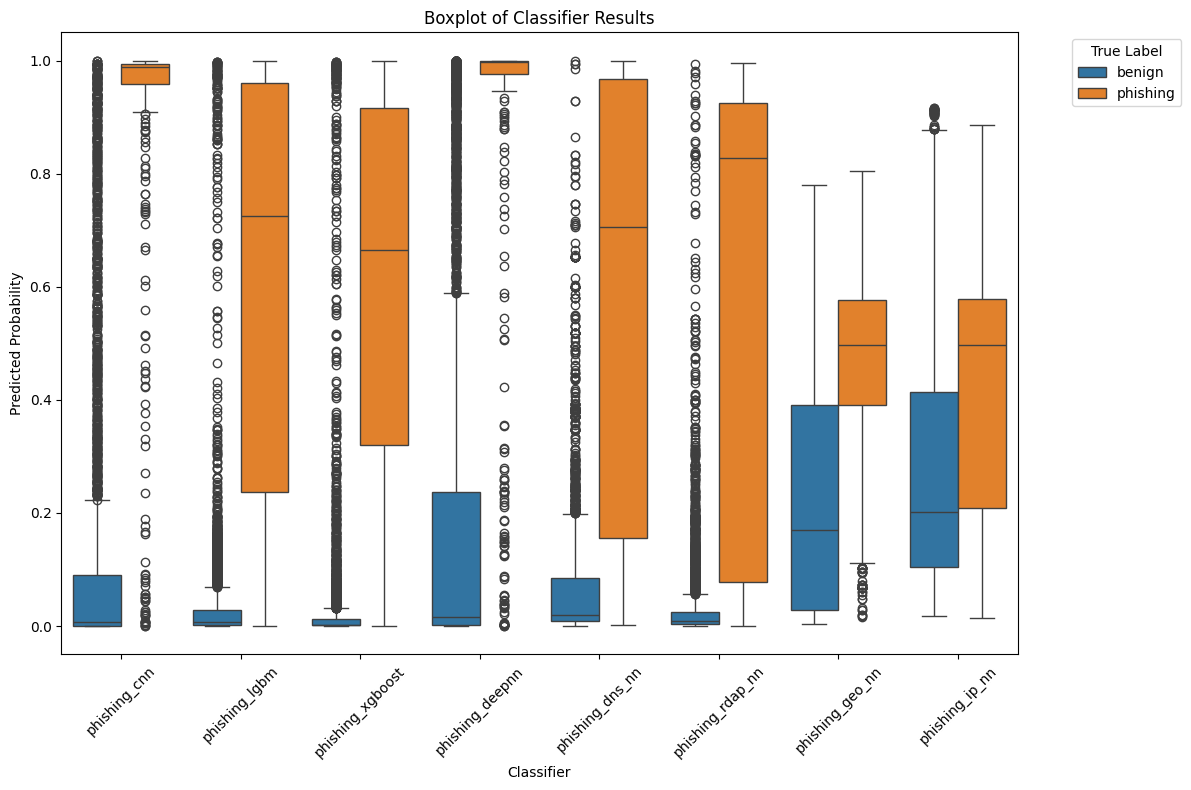

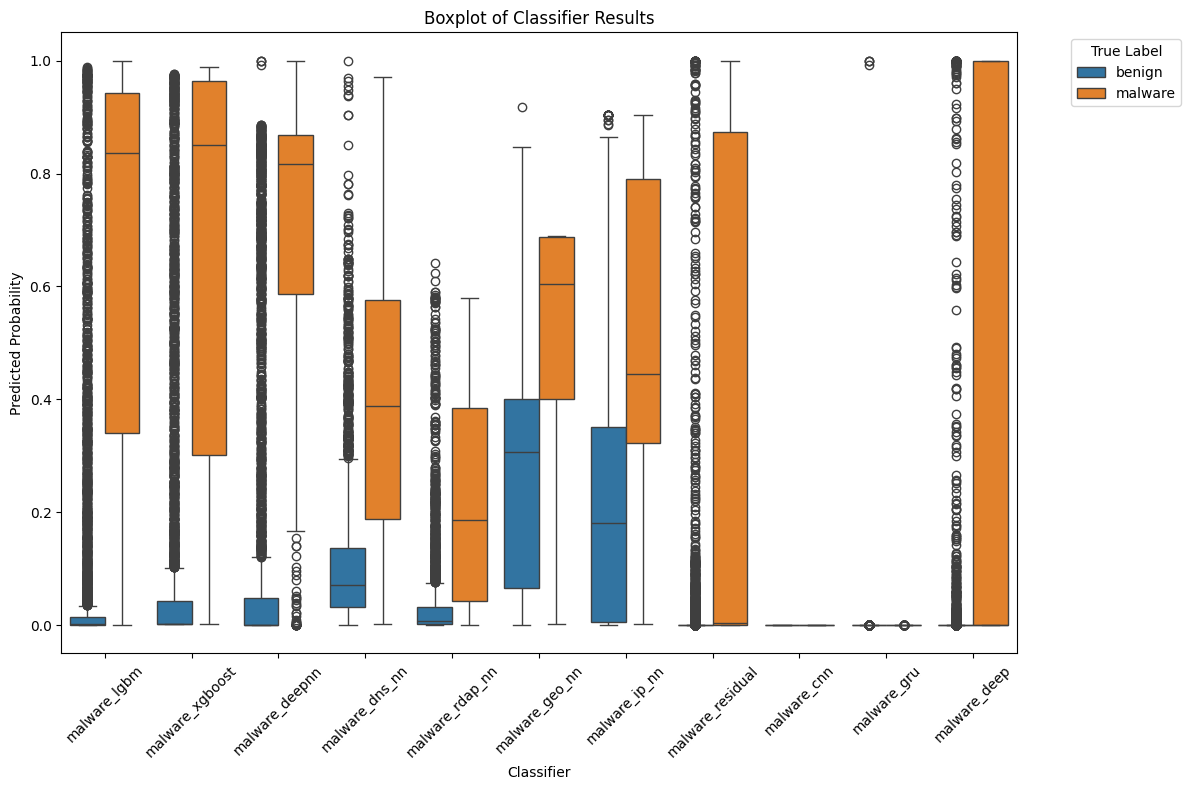

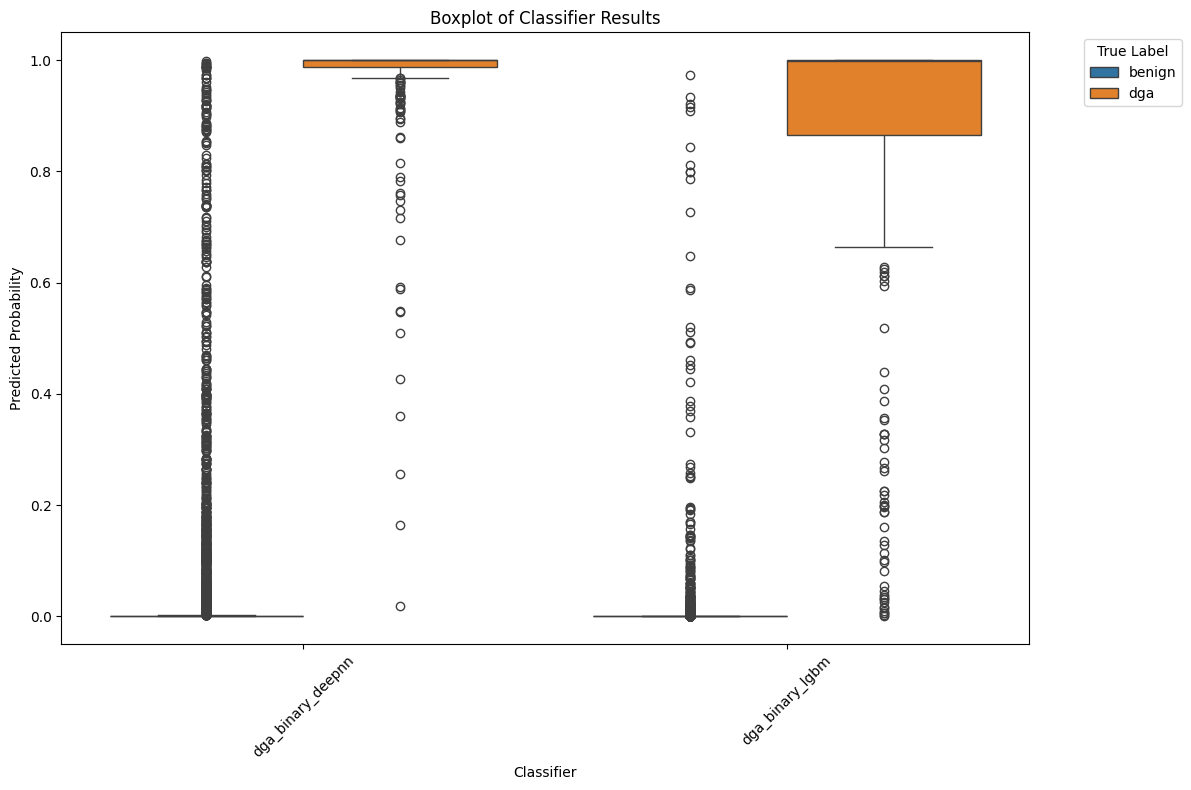

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create a single boxplot for all classifiers
def create_combined_boxplot(df, classifier_prefix, relevant_labels=None):
    # Filter the DataFrame for the relevant labels if provided
    if relevant_labels:
        filtered_df = df[df['label'].isin(relevant_labels)]
    else:
        filtered_df = df  # Use the entire DataFrame if no relevant labels are given
    
    # Find classifiers that match the prefix but exclude ones with '_avg', '_sum', or '_prod'
    classifier_columns = [
        col for col in df.columns 
        if col.startswith(classifier_prefix) and not (col.endswith('_avg') or col.endswith('_sum') or col.endswith('_prod'))
    ]
    
    # Prepare a long-format DataFrame for plotting
    long_df = pd.melt(filtered_df, id_vars='label', value_vars=classifier_columns, 
                      var_name='Classifier', value_name='Predicted Probability')
    
    # Remove the '_result' from classifier names
    long_df['Classifier'] = long_df['Classifier'].str.replace('_result', '')
    
    # Create a single boxplot for all classifiers
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=long_df, x='Classifier', y='Predicted Probability', hue='label')
    plt.title(f'Boxplot of Classifier Results')
    plt.ylabel('Predicted Probability')
    plt.xticks(rotation=45)
    plt.legend(title='True Label', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Combined boxplot for phishing classifiers
create_combined_boxplot(df, 'phishing_', ['benign', 'phishing'])

# Combined boxplot for malware classifiers
create_combined_boxplot(df, 'malware_', ['benign', 'malware'])

# Combined boxplot for dga_binary classifiers
create_combined_boxplot(df, 'dga_binary_', ['benign', 'dga'])


In [ ]:
## F1

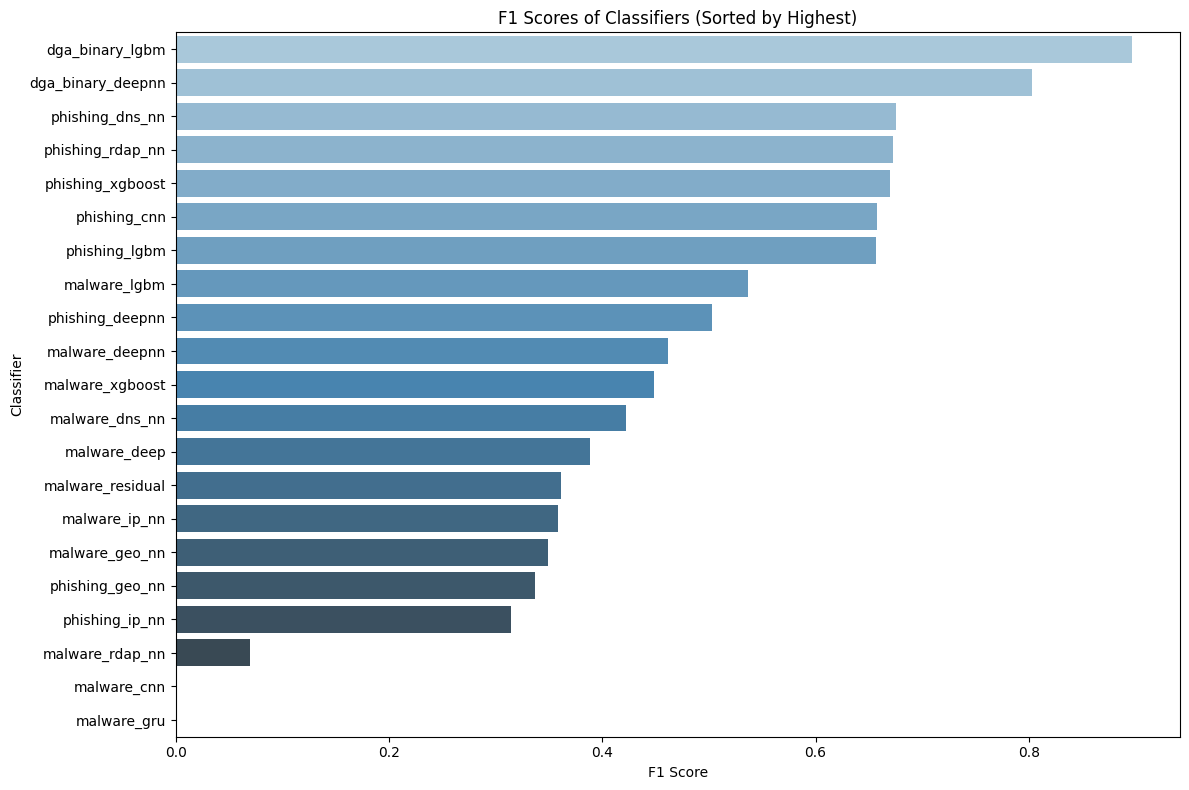

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate metrics for a given set of classifiers
def calculate_metrics(df, classifier_prefix, relevant_labels=None):
    # Filter the DataFrame for the relevant labels if provided
    if relevant_labels:
        filtered_df = df[df['label'].isin(relevant_labels)]
    else:
        filtered_df = df  # Use the entire DataFrame if no relevant labels are given
    
    # Find classifiers that match the prefix but exclude ones with '_avg', '_sum', or '_prod'
    classifier_columns = [
        col for col in df.columns 
        if col.startswith(classifier_prefix) and not (col.endswith('_avg') or col.endswith('_sum') or col.endswith('_prod'))
    ]
    
    # Create a list to store the metrics
    metrics_list = []
    
    # For each classifier, calculate confusion matrix and metrics
    for classifier in classifier_columns:
        y_pred = (filtered_df[classifier] >= 0.5).astype(int)
        y_true = (filtered_df['label'] != 'benign').astype(int)

        # Calculate confusion matrix components
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

        # Calculate metrics
        accuracy = accuracy_score(y_true, y_pred) * 100
        precision = precision_score(y_true, y_pred) if (tp + fp) > 0 else 0
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0

        # Append the results to the list, including F1 score
        metrics_list.append({
            'Classifier': classifier.replace('_result', ''),
            'F1 Score': f1,
        })
    
    # Create a DataFrame from the list
    metrics_df = pd.DataFrame(metrics_list)
    
    return metrics_df

# Calculate metrics for all classifiers (phishing, malware, dga_binary)
phishing_metrics_df = calculate_metrics(df, 'phishing_', ['benign', 'phishing'])
malware_metrics_df = calculate_metrics(df, 'malware_', ['benign', 'malware'])
dga_metrics_df = calculate_metrics(df, 'dga_binary_', ['benign', 'dga'])

# Combine all metrics into a single DataFrame
all_metrics_df = pd.concat([phishing_metrics_df, malware_metrics_df, dga_metrics_df])

# Sort the DataFrame by F1 Score in descending order
sorted_metrics_df = all_metrics_df.sort_values(by='F1 Score', ascending=False)

# Create a barplot of the F1 Scores
plt.figure(figsize=(12, 8))
sns.barplot(data=sorted_metrics_df, x='F1 Score', y='Classifier', palette='Blues_d')
plt.title('F1 Scores of Classifiers (Sorted by Highest)')
plt.xlabel('F1 Score')
plt.ylabel('Classifier')
plt.tight_layout()
plt.show()


## FPR

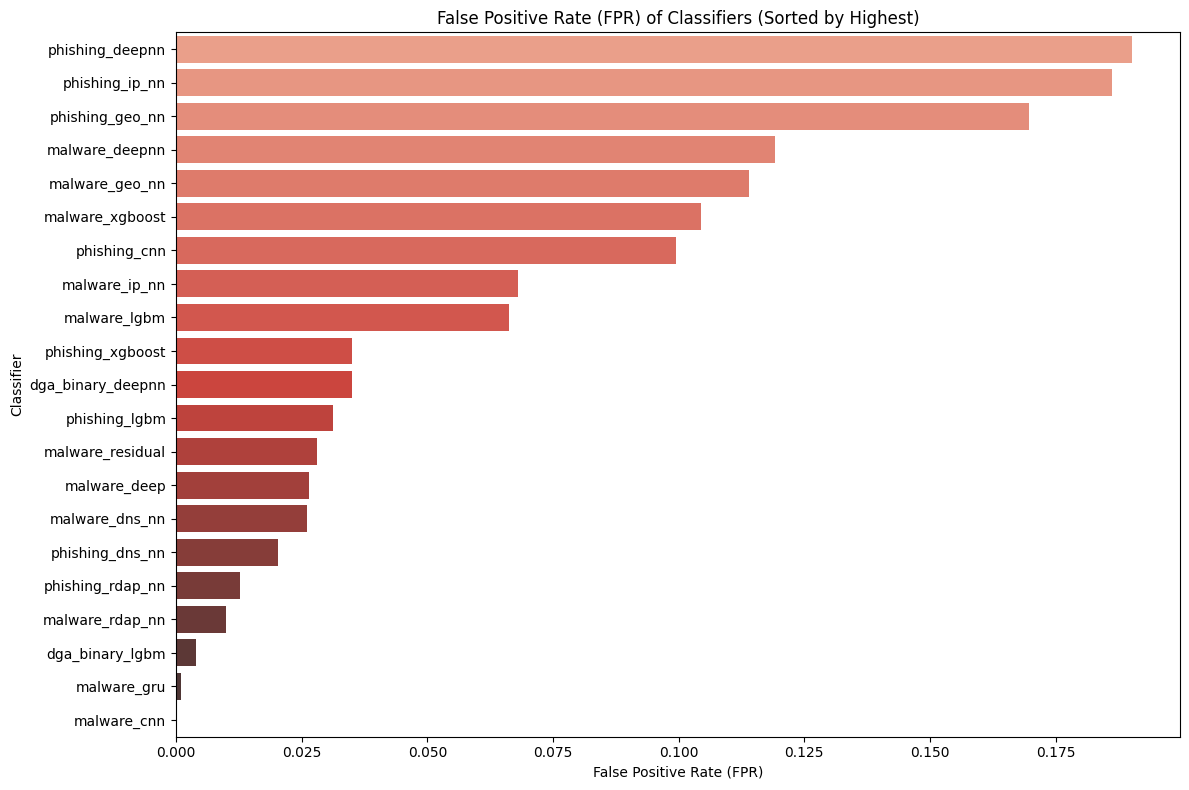

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate metrics for a given set of classifiers
def calculate_metrics(df, classifier_prefix, relevant_labels=None):
    # Filter the DataFrame for the relevant labels if provided
    if relevant_labels:
        filtered_df = df[df['label'].isin(relevant_labels)]
    else:
        filtered_df = df  # Use the entire DataFrame if no relevant labels are given
    
    # Find classifiers that match the prefix but exclude ones with '_avg', '_sum', or '_prod'
    classifier_columns = [
        col for col in df.columns 
        if col.startswith(classifier_prefix) and not (col.endswith('_avg') or col.endswith('_sum') or col.endswith('_prod'))
    ]
    
    # Create a list to store the metrics
    metrics_list = []
    
    # For each classifier, calculate confusion matrix and metrics
    for classifier in classifier_columns:
        y_pred = (filtered_df[classifier] >= 0.5).astype(int)
        y_true = (filtered_df['label'] != 'benign').astype(int)

        # Calculate confusion matrix components
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

        # Calculate metrics
        false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0

        # Append the results to the list, including FPR
        metrics_list.append({
            'Classifier': classifier.replace('_result', ''),
            'FPR': false_positive_rate,
        })
    
    # Create a DataFrame from the list
    metrics_df = pd.DataFrame(metrics_list)
    
    return metrics_df

# Calculate metrics for all classifiers (phishing, malware, dga_binary)
phishing_metrics_df = calculate_metrics(df, 'phishing_', ['benign', 'phishing'])
malware_metrics_df = calculate_metrics(df, 'malware_', ['benign', 'malware'])
dga_metrics_df = calculate_metrics(df, 'dga_binary_', ['benign', 'dga_binary'])

# Combine all metrics into a single DataFrame
all_metrics_df = pd.concat([phishing_metrics_df, malware_metrics_df, dga_metrics_df])

# Sort the DataFrame by FPR in descending order
sorted_metrics_df = all_metrics_df.sort_values(by='FPR', ascending=False)

# Create a barplot of the FPR
plt.figure(figsize=(12, 8))
sns.barplot(data=sorted_metrics_df, x='FPR', y='Classifier', palette='Reds_d')
plt.title('False Positive Rate (FPR) of Classifiers (Sorted by Highest)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('Classifier')
plt.tight_layout()
plt.show()


## Best AVG metric score

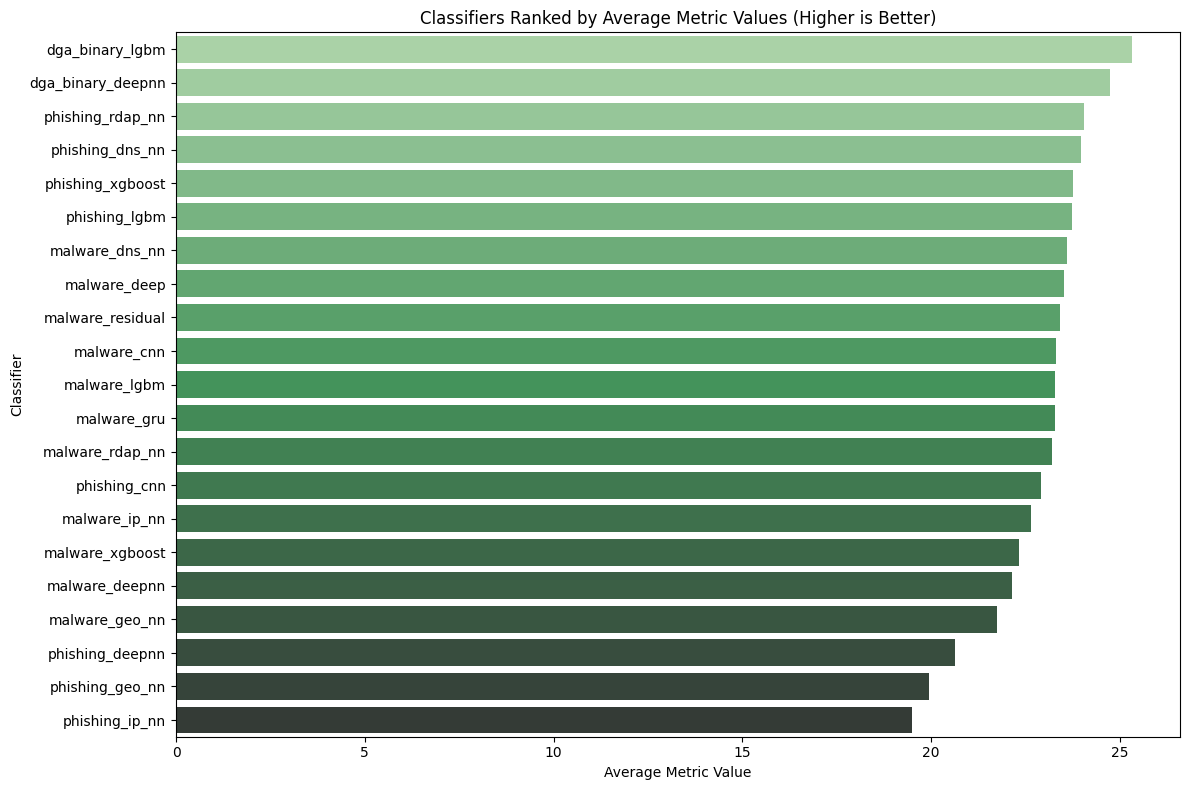

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate metrics for a given set of classifiers
def calculate_metrics(df, classifier_prefix, relevant_labels=None):
    # Filter the DataFrame for the relevant labels if provided
    if relevant_labels:
        filtered_df = df[df['label'].isin(relevant_labels)]
    else:
        filtered_df = df  # Use the entire DataFrame if no relevant labels are given
    
    # Find classifiers that match the prefix but exclude ones with '_avg', '_sum', or '_prod'
    classifier_columns = [
        col for col in df.columns 
        if col.startswith(classifier_prefix) and not (col.endswith('_avg') or col.endswith('_sum') or col.endswith('_prod'))
    ]
    
    # Create a list to store the metrics
    metrics_list = []
    
    # For each classifier, calculate confusion matrix and metrics
    for classifier in classifier_columns:
        y_pred = (filtered_df[classifier] >= 0.5).astype(int)
        y_true = (filtered_df['label'] != 'benign').astype(int)

        # Calculate confusion matrix components
        tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

        # Calculate metrics
        accuracy = accuracy_score(y_true, y_pred) * 100
        precision = precision_score(y_true, y_pred) if (tp + fp) > 0 else 0
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0

        # Append the results to the list
        metrics_list.append({
            'Classifier': classifier.replace('_result', ''),
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'FPR': false_positive_rate
        })
    
    # Create a DataFrame from the list
    metrics_df = pd.DataFrame(metrics_list)
    
    return metrics_df

# Calculate metrics for all classifiers (phishing, malware, dga_binary)
phishing_metrics_df = calculate_metrics(df, 'phishing_', ['benign', 'phishing'])
malware_metrics_df = calculate_metrics(df, 'malware_', ['benign', 'malware'])
dga_metrics_df = calculate_metrics(df, 'dga_binary_', ['benign', 'dga'])

# Combine all metrics into a single DataFrame
all_metrics_df = pd.concat([phishing_metrics_df, malware_metrics_df, dga_metrics_df])

# Calculate the average value across all metrics for each classifier
# Note: We multiply FPR by -1 to make it "reward" lower values instead of higher ones
all_metrics_df['Avg Value'] = all_metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].mean(axis=1) - all_metrics_df['FPR']

# Sort the DataFrame by average value
sorted_metrics_df = all_metrics_df.sort_values(by='Avg Value', ascending=False)

# Create a barplot of the average values
plt.figure(figsize=(12, 8))
sns.barplot(data=sorted_metrics_df, x='Avg Value', y='Classifier', palette='Greens_d')
plt.title('Classifiers Ranked by Average Metric Values (Higher is Better)')
plt.xlabel('Average Metric Value')
plt.ylabel('Classifier')
plt.tight_layout()
plt.show()
